># Group 2 Day-2 Task

- Malak Aman (University of Swabi)
- Rizma Nurpriyanti (Universitas Pendidikan Indonesia)
- Huzaifa Asad (University of Swabi)
- Seth Junior Nti (Universitas Pendidikan Indonesia)
- Jasmine Noor Fawzia (Universitas Pendidikan Indonesia)
- Muhammad Syah Bin Razak Kolej (Poly-Tech Mara Batu Pahat)


Step 1

Load the dataset
Display the first few rows to understand.
Perform exploratory data analysis (EDA).

In [2]:
import pandas as pd
#import python libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('orderdataset.csv')

# Display the first few rows of the dataset
data.head()

,order_id;quantity;product_id;price;seller_id;freight_value;customer_id;order_status;purchase_date;payment_type;product_category_name;product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047;2;f293394c72c...
1,2e7a8482f6fb09756ca50c10d7bfc047;1;c1488892604...
2,e5fa5a7210941f7d56d0208e4e071d35;1;f3c2d01a84c...
3,3b697a20d9e427646d92567910af6d57;1;3ae08df6bcb...
4,71303d7e93b399f5bcd537d124c0bcfa;1;d2998d7ced1...


## Step: 2
>Reload the dataset using the correct delimiter and then inspect the first few rows again. 

In [3]:
# Load the dataset with the correct delimiter
data = pd.read_csv('orderdataset.csv', delimiter=';')

# Display the first few rows of the dataset
data.head()

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,05/09/2016,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,03/10/2016,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,03/10/2016,e-wallet,fashion,500.0


## Step: 3
- Summary Statistics: Get basic statistics for numerical columns.
- Missing Values: Check for any missing values.
- Data Types: Verify the data types of each column.
- Unique Values: Check for unique values in categorical columns.

In [4]:
# Summary statistics for numerical columns
summary_stats = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

# Verify data types
data_types = data.dtypes

# Unique values in categorical columns
unique_values = {col: data[col].nunique() for col in data.select_dtypes(include=['object']).columns}

summary_stats, missing_values, data_types, unique_values

(           quantity         price  freight_value  product_weight_gram
 count  49999.000000  4.999900e+04   49999.000000         49980.000000
 mean       1.197484  2.607784e+06  104521.390428          2201.830892
 std        0.722262  1.388312e+06   55179.844962          3929.896875
 min        1.000000  2.000000e+05    9000.000000            50.000000
 25%        1.000000  1.410500e+06   57000.000000           300.000000
 50%        1.000000  2.610000e+06  104000.000000           800.000000
 75%        1.000000  3.810000e+06  152000.000000          1850.000000
 max       21.000000  5.000000e+06  200000.000000         40425.000000,
 order_id                  0
 quantity                  0
 product_id                0
 price                     0
 seller_id                 0
 freight_value             0
 customer_id               0
 order_status              0
 purchase_date             0
 payment_type              0
 product_category_name     0
 product_weight_gram      19
 dtype: int6

## Step 4

Use Statistical Methods to Identify Significant Relationships

                     quantity     price  freight_value  product_weight_gram
quantity             1.000000 -0.001649      -0.009926            -0.009247
price               -0.001649  1.000000       0.005095             0.002746
freight_value       -0.009926  0.005095       1.000000            -0.005212
product_weight_gram -0.009247  0.002746      -0.005212             1.000000


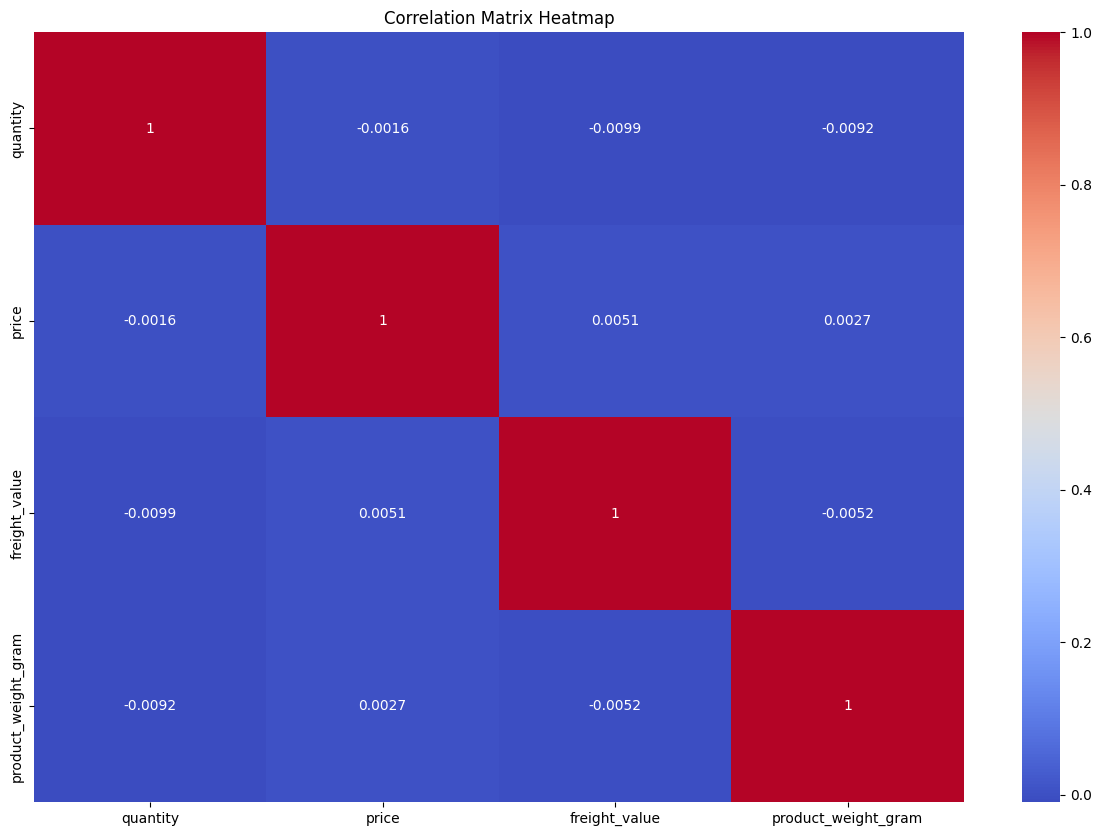

Correlation between Quantity and Freight Value: -0.009926161159768443
T-test between delivered and shipped freight values: t-statistic = 1.022845713777994, p-value = 0.30638582621547517
Coefficient for Quantity: -758.3458366169543
Intercept: 105429.49739546324


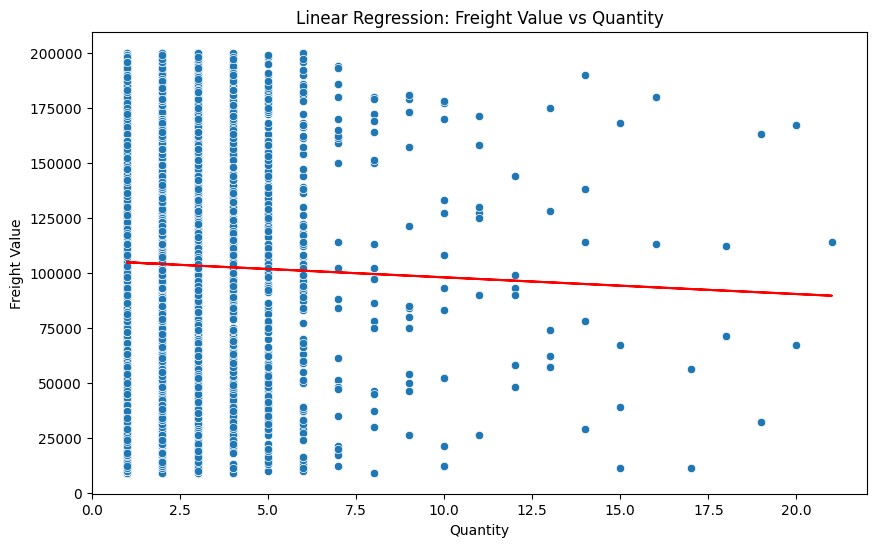

In [5]:
# Additional imports for statistical analysis
from scipy import stats
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert relevant columns to numeric, handling non-numeric values
data['quantity'] = pd.to_numeric(data['quantity'], errors='coerce')
data['freight_value'] = pd.to_numeric(data['freight_value'], errors='coerce')

# Drop rows with NaN values in the relevant columns
data_cleaned = data.dropna(subset=['quantity', 'freight_value'])

# Ensure we only use numeric columns for correlation analysis
numeric_cols = data_cleaned.select_dtypes(include=[np.number]).columns
data_numeric = data_cleaned[numeric_cols]

# Correlation Matrix
correlation_matrix = data_numeric.corr()
print(correlation_matrix)

# Visualization of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Example: Correlation between 'quantity' and 'freight_value'
quantity_freight_corr = data_numeric['quantity'].corr(data_numeric['freight_value'])
print(f'Correlation between Quantity and Freight Value: {quantity_freight_corr}')

# Hypothesis Testing: Comparing the means of two groups
# Example: T-test to compare the means of 'freight_value' between two groups of 'order_status'
order_status_groups = data_cleaned.groupby('order_status')['freight_value']
group1 = order_status_groups.get_group('delivered')
group2 = order_status_groups.get_group('shipped')

t_stat, p_value = stats.ttest_ind(group1, group2, nan_policy='omit')
print(f'T-test between delivered and shipped freight values: t-statistic = {t_stat}, p-value = {p_value}')

# Simple Linear Regression Analysis
# Example: Predicting 'freight_value' based on 'quantity'
X = data_numeric[['quantity']]  # Independent variable
y = data_numeric['freight_value']  # Dependent variable

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Coefficient and intercept
print(f'Coefficient for Quantity: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quantity', y='freight_value', data=data_cleaned)
plt.plot(X, model.predict(X), color='red')
plt.title('Linear Regression: Freight Value vs Quantity')
plt.xlabel('Quantity')
plt.ylabel('Freight Value')
plt.show()


## Step 5

Visualizing the data with charts and graphs to see patterns and relationships

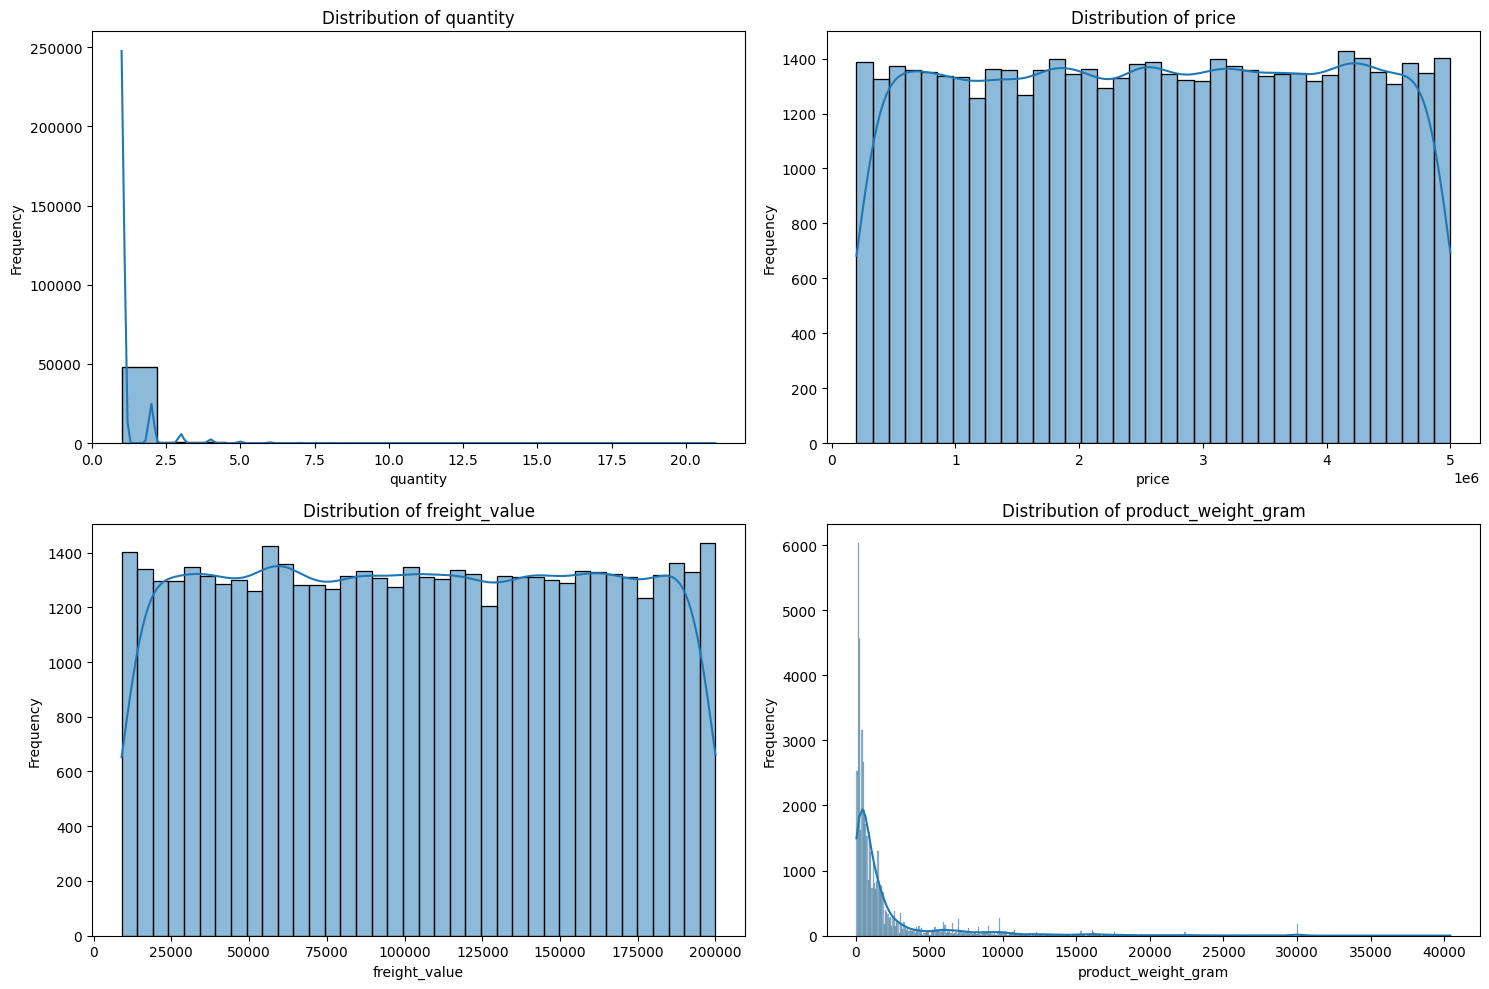

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot histograms for numerical columns
numerical_columns = ['quantity', 'price', 'freight_value', 'product_weight_gram']
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()